In [39]:
# run this to shorten the data import from the files
import os
cwd = os.path.dirname(os.getcwd())+'/'
path_data = os.path.join(os.path.dirname(os.getcwd()), 'datasets/')


In [40]:
import zipfile
import io
import pandas as pd

def load_file(file_path, file_name):
    # Open the zip file
    with zipfile.ZipFile(file_path, 'r') as zip_ref:
        # Check if the CSV file is present in the zip file
        if file_name in zip_ref.namelist():
            # Read the CSV content into a pandas DataFrame
            with zip_ref.open(file_name) as csv_file:
                df = pd.read_csv(io.TextIOWrapper(csv_file, 'utf-8'))
                csv_file.close()
    return df


In [41]:
# exercise 01

"""
Your first time series

You have learned in the video how to create a sequence of dates using pd.date_range(). You have also seen that each date in the resulting pd.DatetimeIndex is a pd.Timestamp with various attributes that you can access to obtain information about the date.

Now, you'll create a week of data, iterate over the result, and obtain the dayofweek and day_name() for each date.
"""

# Instructions

"""
We have already imported pandas as pd for you.

    Use pd.date_range to create seven dates starting from '2017-1-1' at (default) daily frequency. Use the arguments start and periods. Assign the result to seven_days.
    
    Iterate over each date in seven_days and in each iteration, print the .dayofweek and .day_name() attributes.

"""

# solution
import pandas as pd

# Create the range of dates here
seven_days = pd.date_range(start="2017-01-01", periods=7, freq="D")

# Iterate over the dates and print the number and name of the weekday
for day in seven_days:
    print(day.dayofweek, day.day_name())



#----------------------------------#

# Conclusion

"""
Congrats! You just built your first time series!
"""

6 Sunday
0 Monday
1 Tuesday
2 Wednesday
3 Thursday
4 Friday
5 Saturday


'\nCongrats! You just built your first time series!\n'

In [42]:
data = load_file(path_data+"air_quality_data.zip", "nyc.csv")
data.head()

,date,ozone,pm25,co
0,1999-07-01,0.012024,20.000000,1.300686
1,1999-07-02,0.027699,23.900000,0.958194
2,1999-07-03,0.043969,36.700000,1.194444
3,1999-07-04,0.035161,39.000000,1.081548
4,1999-07-05,0.038359,28.171429,0.939583


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6317 entries, 0 to 6316
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    6317 non-null   object 
 1   ozone   6317 non-null   float64
 2   pm25    6317 non-null   float64
 3   co      6317 non-null   float64
dtypes: float64(3), object(1)
memory usage: 197.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6317 entries, 1999-07-01 to 2017-03-31
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ozone   6317 non-null   float64
 1   pm25    6317 non-null   float64
 2   co      6317 non-null   float64
dtypes: float64(3)
memory usage: 197.4 KB
None


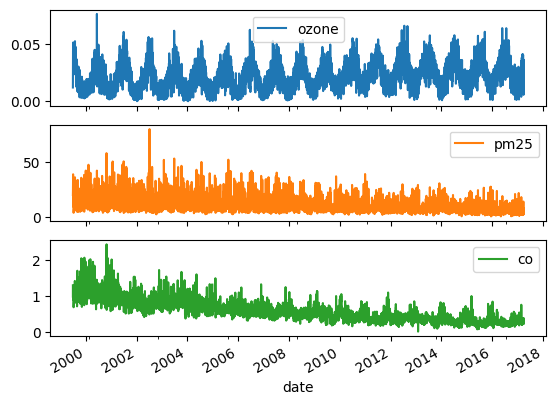

'\nGreat work! pandas makes it easy to turn a DataFrame into a time series!\n'

In [43]:
# exercise 02

"""
Create a time series of air quality data

You have seen in the video how to deal with dates that are not in the correct format, but instead are provided as string types, represented as dtype object in pandas.

We have prepared a data set with air quality data (ozone, pm25, and carbon monoxide for NYC, 2000-2017) for you to practice the use of pd.to_datetime().
"""

# Instructions

"""
We have already imported pandas as pd and matplotlib.pyplot as plt for you, and loaded the air quality DataFrame into the variable data.

    Inspect data using .info().
    Use pd.to_datetime to convert the column 'date' to dtype datetime64.
    Set the 'date' column as index.
    Validate the changes by inspecting data using .info() again.
    Plot data using subplots=True.

"""

# solution
import matplotlib.pyplot as plt

# Inspect data
print(data.info())

# Convert the date column to datetime64
data.date = pd.to_datetime(data.date)

# Set date column as index
data.set_index('date', inplace=True)

# Inspect data 
print(data.info())

# Plot data
data.plot(subplots=True)
plt.show()

#----------------------------------#

# Conclusion

"""
Great work! pandas makes it easy to turn a DataFrame into a time series!
"""

In [44]:
yahoo = load_file(path_data+"stock_data.zip", 'yahoo.csv')
yahoo.date = pd.to_datetime(yahoo.date)
yahoo.set_index('date', inplace=True)
yahoo.head()

,price
date,
2013-01-02,20.08
2013-01-03,19.78
2013-01-04,19.86
2013-01-07,19.40
2013-01-08,19.66


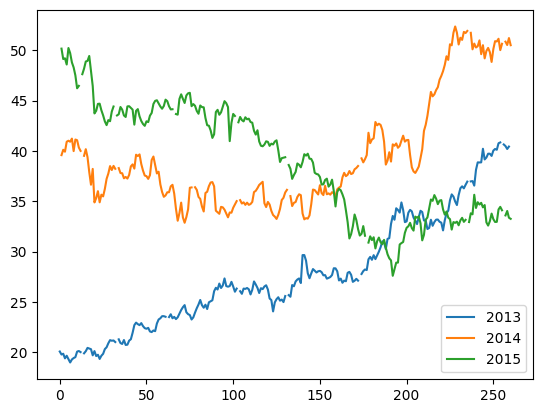

"\nAwesome! The plot you just created shows Yahoo's stock price in three different years.\n"

In [45]:
# exercise 03

"""
Compare annual stock price trends

In the video, you have seen how to select sub-periods from a time series.

You'll use this to compare the performance for three years of Yahoo stock prices.
"""

# Instructions

"""
We have already imported pandas as pd and matplotlib.pyplot as plt and we have already loaded the 'yahoo.csv' file in a variable yahoo with DateTimeIndex and a single column price.

    Create an empty pd.DataFrame() called prices.
    Iterate over a list containing the three years, 2013, 2014, and 2015, as string, and in each loop:
        Use the iteration variable to select the data for this year and the column price.
        Use .reset_index() with drop=True to remove the DatetimeIndex.
        Rename the column price column to the appropriate year.
        Use pd.concat() to combine the yearly data with the data in prices along axis=1.
    Plot prices.

"""

# solution

# Create dataframe prices here
prices = pd.DataFrame()

# Select data for each year and concatenate with prices here 
for year in ['2013', '2014', '2015']:
    price_per_year = yahoo.loc[year, ['price']].reset_index(drop=True)
    price_per_year.rename(columns={'price': year}, inplace=True)
    prices = pd.concat([prices, price_per_year], axis=1)

# Plot prices
prices.plot()
plt.show()

#----------------------------------#

# Conclusion

"""
Awesome! The plot you just created shows Yahoo's stock price in three different years.
"""

In [46]:
co = load_file(path_data+"air_quality_data.zip", "co_cities.csv")
co.date = pd.to_datetime(co.date)
co.set_index('date', inplace=True)
co.head()

,Chicago,Los Angeles,New York
date,,,
2005-01-01,0.317763,0.777657,0.639830
2005-01-03,0.520833,0.349547,0.969572
2005-01-04,0.477083,0.626630,0.905208
2005-01-05,0.348822,0.613814,0.769176
2005-01-06,0.572917,0.792596,0.815761


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1898 entries, 2005-01-01 to 2010-12-31
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Chicago      1898 non-null   float64
 1   Los Angeles  1898 non-null   float64
 2   New York     1898 non-null   float64
dtypes: float64(3)
memory usage: 59.3 KB
None


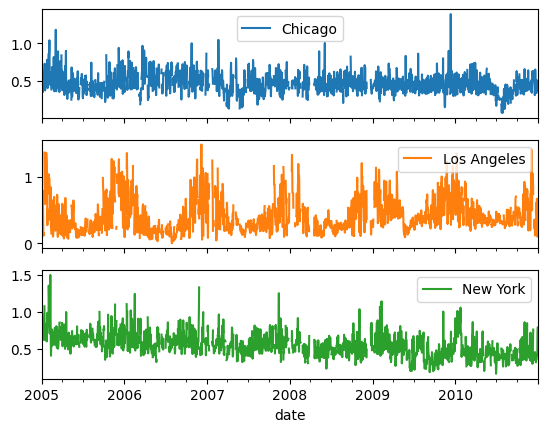

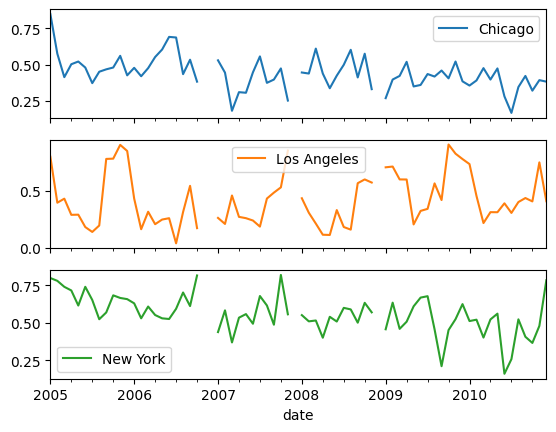

'\nGreat work! How does changing the frequency of the data affect the plot output?\n'

In [47]:
# exercise 04

"""
Set and change time series frequency

In the video, you have seen how to assign a frequency to a DateTimeIndex, and then change this frequency.

Now, you'll use data on the daily carbon monoxide concentration in NYC, LA and Chicago from 2005-17.

You'll set the frequency to calendar daily and then resample to monthly frequency, and visualize both series to see how the different frequencies affect the data.
"""

# Instructions

"""
We have already imported pandas as pd and matplotlib.pyplot as plt and we have already loaded the co_cities.csv file in a variable co.

    Inspect co using .info().
    Use .asfreq() to set the frequency to calendar daily.
    Show a plot of 'co' using subplots=True.
    Change the the frequency to monthly using the alias 'M'.
    Show another plot of co using subplots=True.

"""

# solution

# Inspect data
print(co.info())

# Set the frequency to calendar daily
co = co.asfreq("D")

# Plot the data
co.plot(subplots=True)
plt.show()


# Set frequency to monthly
co = co.asfreq("M")

# Plot the data
co.plot(subplots=True)
plt.show()

#----------------------------------#

# Conclusion

"""
Great work! How does changing the frequency of the data affect the plot output?
"""

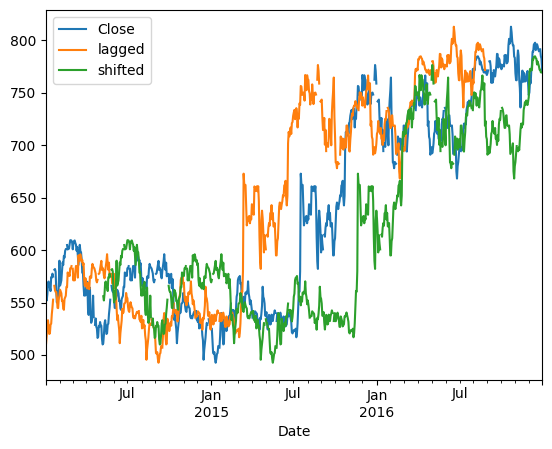

'\nFantastic! Now you can visually compare the time series to itself at different points in time.\n'

In [48]:
# exercise 05

"""
Shifting stock prices across time

The first method to manipulate time series that you saw in the video was .shift(), which allows you shift all values in a Series or DataFrame by a number of periods to a different time along the DateTimeIndex.

Let's use this to visually compare a stock price series for Google shifted 90 business days into both past and future.
"""

# Instructions

"""
We have already imported pandas as pd and matplotlib.pyplot as plt.

    Use pd.read_csv() to import 'google.csv', parsing the 'Date' as dates, setting the result as index and assigning to google.
    Use .asfreq() to set the frequency of google to business daily.
    Add new columns lagged and shifted to google that contain the Close shifted by 90 business days into past and future, respectively.
    Plot the three columns of google.

"""

# solution

# Import data here
# google = pd.read_csv('google.csv', parse_dates=["Date"], index_col="Date")
google = load_file(path_data+'stock_data.zip', 'google.csv')
google.Date = pd.to_datetime(google.Date)
google.set_index("Date", inplace=True)

# Set data frequency to business daily
google = google.asfreq('B')

# Create 'lagged' and 'shifted'
google['lagged'] = google.Close.shift(periods=-90)
google['shifted'] = google.Close.shift(periods=90)

# Plot the google price series
google[["Close","lagged","shifted"]].plot()
plt.show()


#----------------------------------#

# Conclusion

"""
Fantastic! Now you can visually compare the time series to itself at different points in time.
"""

In [49]:
# exercise 06

"""
Calculating stock price changes

You have learned in the video how to calculate returns using current and shifted prices as input. Now you'll practice a similar calculation to calculate absolute changes from current and shifted prices, and compare the result to the function .diff().
"""

# Instructions

"""
We have already imported pandas as pd and matplotlib.pyplot as plt. We have also loaded Yahoo stock prices for the years 2013 to 2015, set the frequency to business daily, and assigned the result to yahoo.

    Create a new column called shifted_30 that contains the 'price' shifted by 30 business days into the future.
    Subtract 'shifted_30' from 'price', and assign the result to a new column, 'change_30'.
    Apply .diff(), setting periods to 30, and assign the result to a new column, 'diff_30'.
    Inspect the last five rows of yahoo to verify the calculation.
    Subtract diff_30 from change_30 using the .sub() method and print the .value_counts() of the result to show both columns are equal.

"""

# solution

# Created shifted_30 here
yahoo['shifted_30'] = yahoo.price.shift(periods=30)

# Subtract shifted_30 from price
yahoo['change_30'] = yahoo.price.sub(yahoo.shifted_30)

# Get the 30-day price difference
yahoo['diff_30'] = yahoo.price.diff(periods=30)

# Inspect the last five rows of price
print(yahoo.tail())

# Show the value_counts of the difference between change_30 and diff_30
print(yahoo.change_30.sub(yahoo.diff_30).value_counts())


#----------------------------------#

# Conclusion

"""
Great work! There's usually more than one way to get to the same result when working with data.
"""

            price  shifted_30  change_30  diff_30
date                                             
2015-12-25    NaN       32.19        NaN      NaN
2015-12-28  33.60       32.94       0.66     0.66
2015-12-29  34.04       32.86       1.18     1.18
2015-12-30  33.37       32.98       0.39     0.39
2015-12-31  33.26       32.62       0.64     0.64
0.0    703
Name: count, dtype: int64


"\nGreat work! There's usually more than one way to get to the same result when working with data.\n"

In [50]:
google.drop(columns=["lagged",'shifted'], inplace=True)
google

,Close
Date,
2014-01-02,556.00
2014-01-03,551.95
2014-01-06,558.10
2014-01-07,568.86
2014-01-08,570.04
...,...
2016-12-26,NaN
2016-12-27,791.55
2016-12-28,785.05


In [56]:
google = google.asfreq("D")

/tmp/ipykernel_73702/3607657605.py:24: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  google['daily_return'] = google.Close.pct_change(1).mul(100)
/tmp/ipykernel_73702/3607657605.py:27: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  google['monthly_return'] = google.Close.pct_change(30).mul(100)
/tmp/ipykernel_73702/3607657605.py:30: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  google['annual_return']

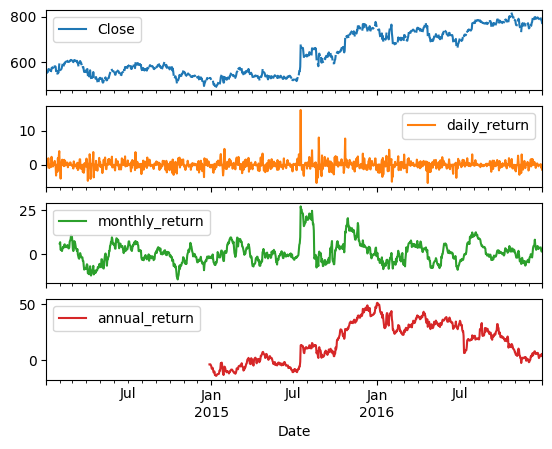

'\nPerfect! How do the returns for different periods compare?\n'

In [58]:
# exercise 07

"""
Plotting multi-period returns

The last time series method you have learned about in the video was .pct_change(). Let's use this function to calculate returns for various calendar day periods, and plot the result to compare the different patterns.

We'll be using Google stock prices from 2014-2016.
"""

# Instructions

"""
We have already imported pandas as pd, and matplotlib.pyplot as plt. We have also loaded 'GOOG' stock prices for the years 2014-2016, set the frequency to calendar daily, and assigned the result to google.

    Create the columns 'daily_return', 'monthly_return', and 'annual_return' that contain the pct_change() of 'Close' for 1, 30 and 360 calendar days, respectively, and multiply each by 100.
    Plot the result using subplots=True.

"""

# solution

# Create daily_return
google['daily_return'] = google.Close.pct_change(1).mul(100)

# Create monthly_return
google['monthly_return'] = google.Close.pct_change(30).mul(100)

# Create annual_return
google['annual_return'] = google.Close.pct_change(360).mul(100)

# Plot the result
google.plot(subplots=True)
plt.show()

#----------------------------------#

# Conclusion

"""
Perfect! How do the returns for different periods compare?
"""